In [2]:
from sklearn.datasets import load_diabetes

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = load_diabetes()
print(df)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [16]:
X = pd.DataFrame(df.data)
X.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [17]:
X.columns = df.feature_names # independent features

In [18]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [19]:
Y = pd.DataFrame(df.target) # dependent feature 
Y.head() 


,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


Linear Regression

1. How to do the cross-validation ? https://scikit-learn.org/stable/modules/cross_validation.html

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [25]:
linear_regressor = LinearRegression()
mse = cross_val_score(linear_regressor,X,Y,scoring="neg_mean_squared_error",cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-2993.08131046933


Ridge Regression

Video tutorial : https://youtu.be/0yI0-r3Ly40?si=xtgw1ecjVkiKWfhi

In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [27]:
ridge  = Ridge()
# testing various values of alpha for our model
parameters = {'alpha':[ 1e-15, 1e-10, 1e-8,1e-3,1e-2,1,5,10, 20, 30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge,param_grid=parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,Y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [31]:
print(ridge_regressor.best_score_)
print(ridge_regressor.best_params_)

-2993.066154653871
{'alpha': 0.001}


Testing our ridge regression on test data

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state =0)

In [35]:
prediction_ridge = ridge_regressor.predict(X_test)


/var/folders/gv/zy0rmxt95n5cb0ks8x32yvtc0000gn/T/ipykernel_1464/2351894422.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_ridge)


<Axes: ylabel='Density'>

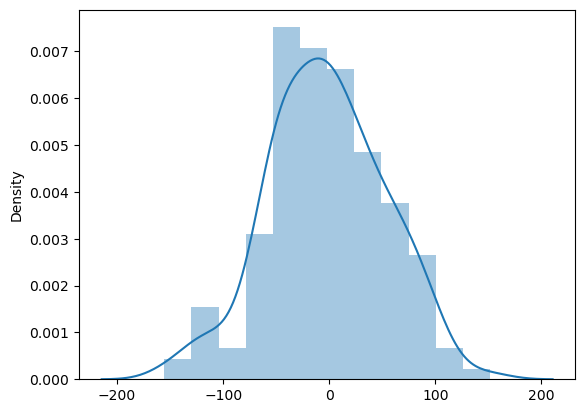

In [38]:
import seaborn as sns
sns.distplot(y_test-prediction_ridge)

Lasso Regression

In [40]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [43]:
lasso_regressor = GridSearchCV(lasso,param_grid=parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,Y)

/Users/yash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.122e+05, tolerance: 2.153e+02
  model = cd_fast.enet_coordinate_descent(
/Users/yash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.004e+05, tolerance: 2.044e+02
  model = cd_fast.enet_coordinate_descent(
/Users/yash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

-2993.081309274593


/Users/yash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.642e+03, tolerance: 2.621e+02
  model = cd_fast.enet_coordinate_descent(


In [45]:
print(lasso_regressor.best_score_)
print(lasso_regressor.best_params_)

-2993.081309274593
{'alpha': 1e-08}


In [49]:
prediction_lasso = lasso_regressor.predict(X_test)